In [ ]:
from google.colab import files
uploaded = files.upload()

Saving dinosaur.jpg to dinosaur.jpg


width: 340 pixels
height: 340 pixels
channels: 3


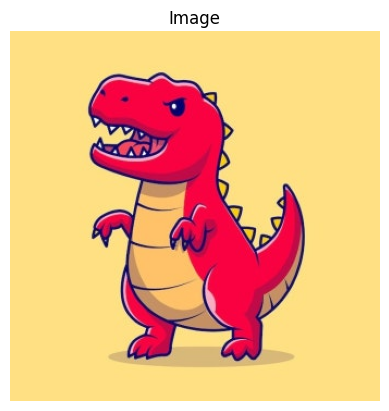

In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

image_path = "/content/dinosaur.jpg"

image = cv2.imread(image_path)

if image is None:
    print(f"Error: Could not load image from {image_path}")
else:
    print("width: {} pixels".format(image.shape[1]))
    print("height: {} pixels".format(image.shape[0]))
    print("channels: {}".format(image.shape[2]))

    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title("Image")
    plt.axis("off")
    plt.show()

Saving dinosaur.jpg to dinosaur (2).jpg


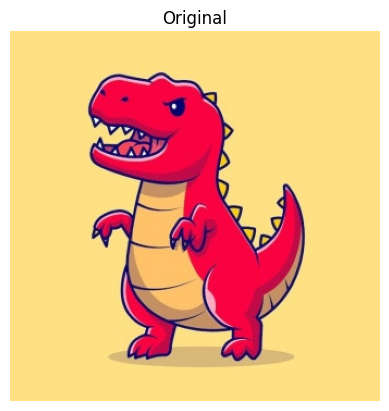

Pixel at (0, 0) – Red: 255, Green: 224, Blue: 131
Pixel at (0, 0) – Red: 255, Green: 0, Blue: 0


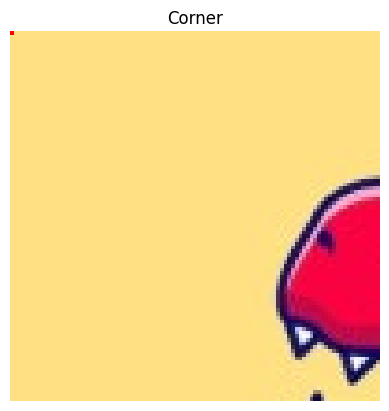

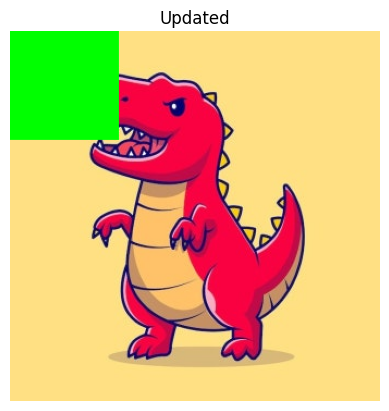

In [ ]:
uploaded = files.upload()
image_path = list(uploaded.keys())[0]
image = cv2.imread(image_path)

def show_image(title, img):
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img_rgb)
    plt.title(title)
    plt.axis('off')
    plt.show()

show_image("Original", image)

(b, g, r) = image[0, 0]
print("Pixel at (0, 0) – Red: {}, Green: {}, Blue: {}".format(r, g, b))

image[0, 0] = (0, 0, 255)
(b, g, r) = image[0, 0]
print("Pixel at (0, 0) – Red: {}, Green: {}, Blue: {}".format(r, g, b))

corner = image[0:100, 0:100]
show_image("Corner", corner)

image[0:100, 0:100] = (0, 255, 0)
show_image("Updated", image)


Saving dinosaur.jpg to dinosaur (3).jpg


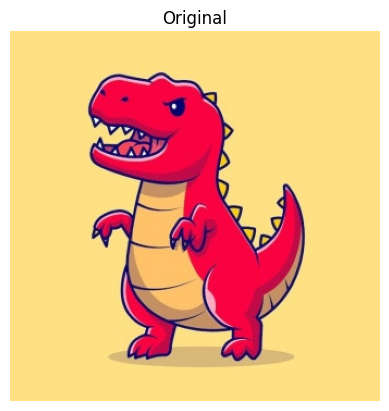

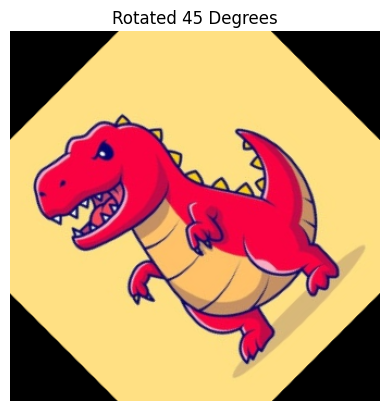

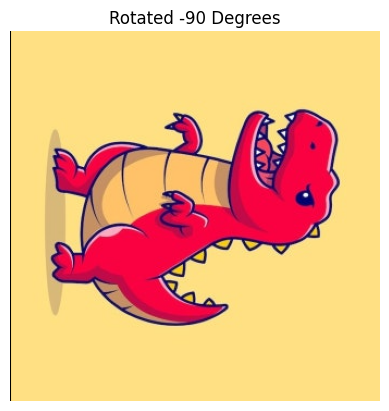

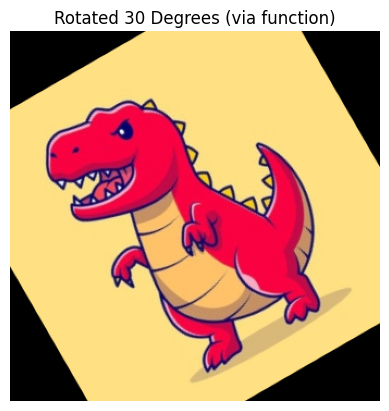

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from google.colab import files

uploaded = files.upload()
image_path = list(uploaded.keys())[0]
image = cv2.imread(image_path)

(h, w) = image.shape[:2]
center = (w // 2, h // 2)

M1 = cv2.getRotationMatrix2D(center, 45, 1.0)
rotated_45 = cv2.warpAffine(image, M1, (w, h))

M2 = cv2.getRotationMatrix2D(center, -90, 1.0)
rotated_m90 = cv2.warpAffine(image, M2, (w, h))

def rotate(image, angle, center=None, scale=1.0):
    (h, w) = image.shape[:2]
    if center is None:
        center = (w // 2, h // 2)
    M = cv2.getRotationMatrix2D(center, angle, scale)
    rotated = cv2.warpAffine(image, M, (w, h))
    return rotated

rotated_30 = rotate(image, 30)

def show_image(img, title="Image"):
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img_rgb)
    plt.title(title)
    plt.axis('off')
    plt.show()

show_image(image, "Original")
show_image(rotated_45, "Rotated 45 Degrees")
show_image(rotated_m90, "Rotated -90 Degrees")
show_image(rotated_30, "Rotated 30 Degrees (via function)")


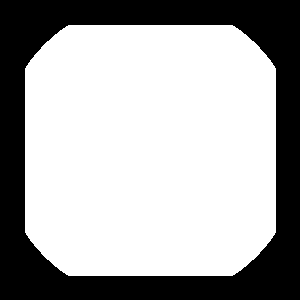

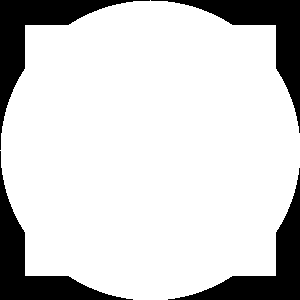

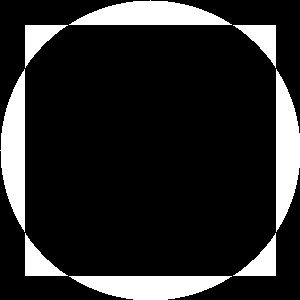

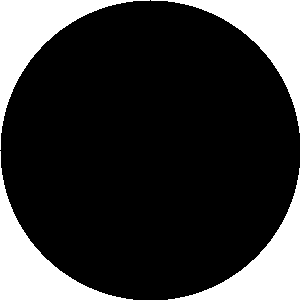

In [ ]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow

rectangle = np.zeros((300, 300), dtype="uint8")
cv2.rectangle(rectangle, (25, 25), (275, 275), 255, -1)

circle = np.zeros((300, 300), dtype="uint8")
cv2.circle(circle, (150, 150), 150, 255, -1)

bitwiseAnd = cv2.bitwise_and(rectangle, circle)
bitwiseOr = cv2.bitwise_or(rectangle, circle)
bitwiseXor = cv2.bitwise_xor(rectangle, circle)
bitwiseNot = cv2.bitwise_not(circle)

cv2_imshow(bitwiseAnd)
cv2_imshow(bitwiseOr)
cv2_imshow(bitwiseXor)
cv2_imshow(bitwiseNot)
cv2.waitKey(0)
cv2.destroyAllWindows()

Saving dinosaur.jpg to dinosaur.jpg


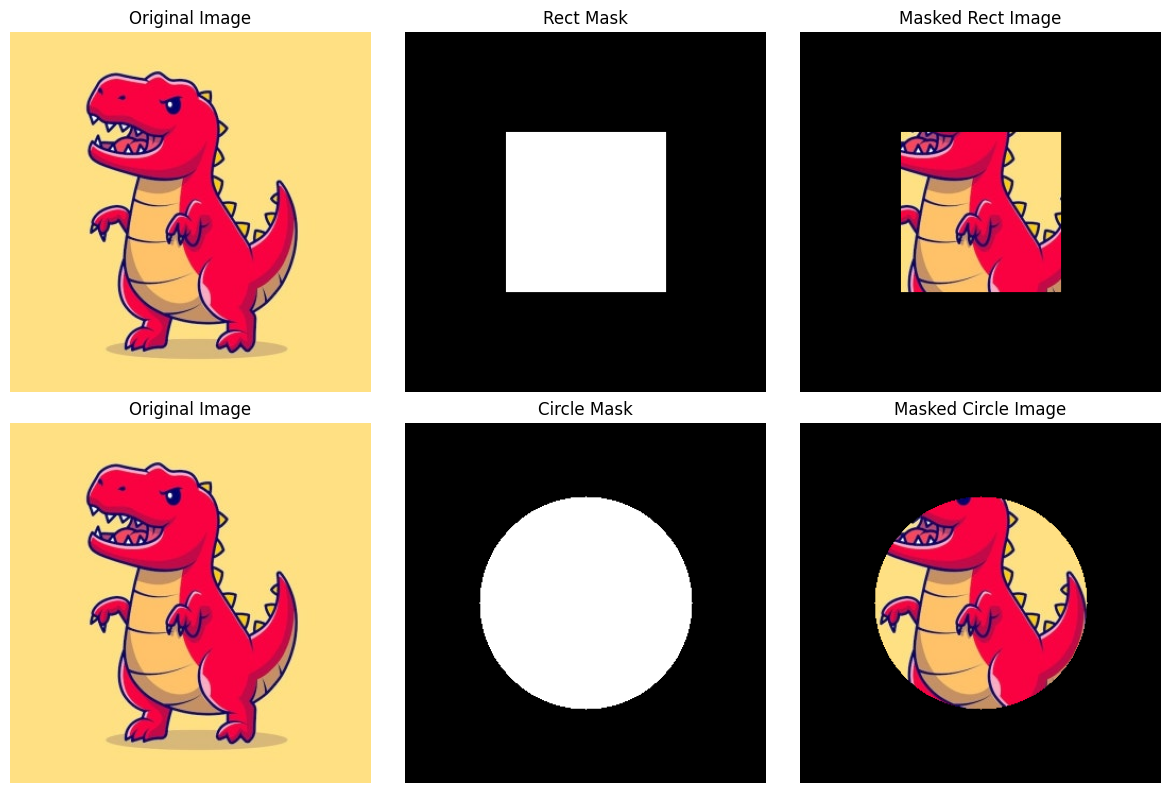

In [ ]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow
from matplotlib import pyplot as plt
from google.colab import files

uploaded = files.upload()
image_path = list(uploaded.keys())[0]
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# 이미지 중앙 좌표 계산
(cX, cY) = (image.shape[1] // 2, image.shape[0] // 2)

# 직사각형 마스크 생성
mask_rect = np.zeros(image.shape[:2], dtype="uint8")
cv2.rectangle(mask_rect, (cX - 75, cY - 75), (cX + 75, cY + 75), 255, -1)
masked_rect = cv2.bitwise_and(image, image, mask=mask_rect)

# 원형 마스크 생성
mask_circle = np.zeros(image.shape[:2], dtype="uint8")
cv2.circle(mask_circle, (cX, cY), 100, 255, -1)
masked_circle = cv2.bitwise_and(image, image, mask=mask_circle)

# 시각화
fig, axes = plt.subplots(2, 3, figsize=(12, 8))
axes = axes.ravel()

axes[0].imshow(image)
axes[0].set_title("Original Image")
axes[1].imshow(mask_rect, cmap='gray')
axes[1].set_title("Rect Mask")
axes[2].imshow(masked_rect)
axes[2].set_title("Masked Rect Image")

axes[3].imshow(image)
axes[3].set_title("Original Image")
axes[4].imshow(mask_circle, cmap='gray')
axes[4].set_title("Circle Mask")
axes[5].imshow(masked_circle)
axes[5].set_title("Masked Circle Image")

for ax in axes:
    ax.axis("off")

plt.tight_layout()
plt.show()

Saving dinosaur.jpg to dinosaur.jpg


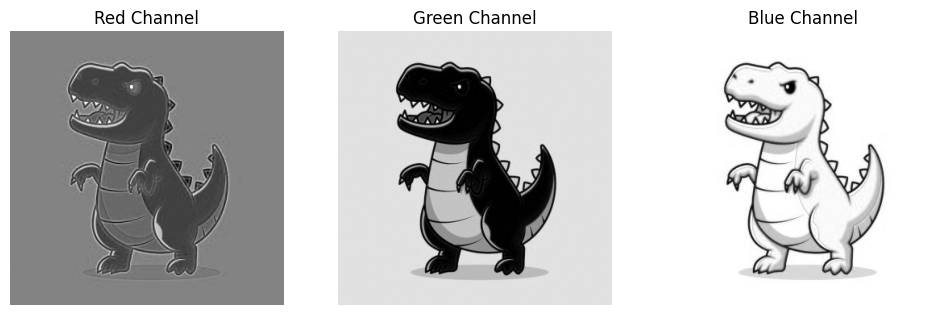

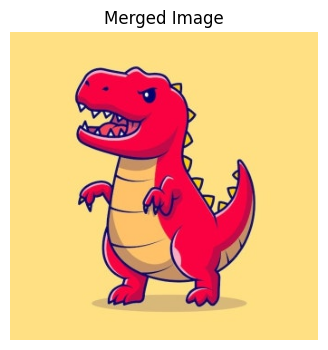

In [ ]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
from google.colab import files


uploaded = files.upload()
image_path = list(uploaded.keys())[0]
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

(B, G, R) = cv2.split(image)

fig, axes = plt.subplots(1, 3, figsize=(12, 4))
axes[0].imshow(R, cmap='gray')
axes[0].set_title("Red Channel")
axes[1].imshow(G, cmap='gray')
axes[1].set_title("Green Channel")
axes[2].imshow(B, cmap='gray')
axes[2].set_title("Blue Channel")
for ax in axes:
    ax.axis("off")
plt.show()

merged = cv2.merge([B, G, R])

plt.figure(figsize=(4, 4))
plt.imshow(merged)
plt.title("Merged Image")
plt.axis("off")
plt.show()

Saving dinosaur.jpg to dinosaur.jpg


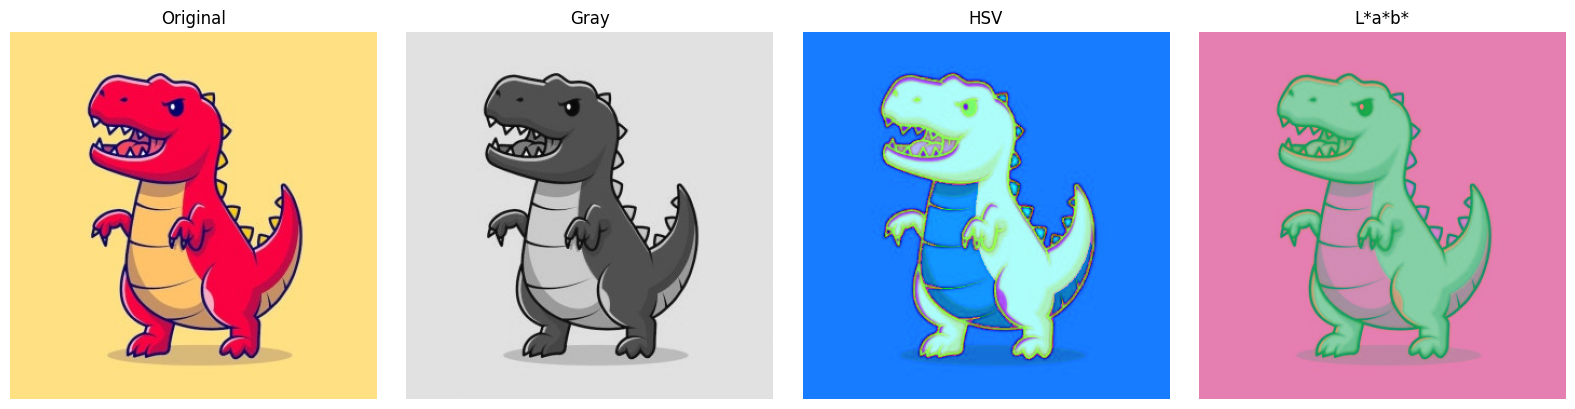

In [ ]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
from google.colab import files


uploaded = files.upload()
image_path = list(uploaded.keys())[0]
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
hsv = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)
lab = cv2.cvtColor(image, cv2.COLOR_RGB2LAB)

fig, axes = plt.subplots(1, 4, figsize=(16, 4))
axes[0].imshow(image)
axes[0].set_title("Original")
axes[1].imshow(gray, cmap='gray')
axes[1].set_title("Gray")
axes[2].imshow(hsv)
axes[2].set_title("HSV")
axes[3].imshow(lab)
axes[3].set_title("L*a*b*")

for ax in axes:
    ax.axis("off")
plt.tight_layout()
plt.show()

Saving dinosaur.jpg to dinosaur.jpg


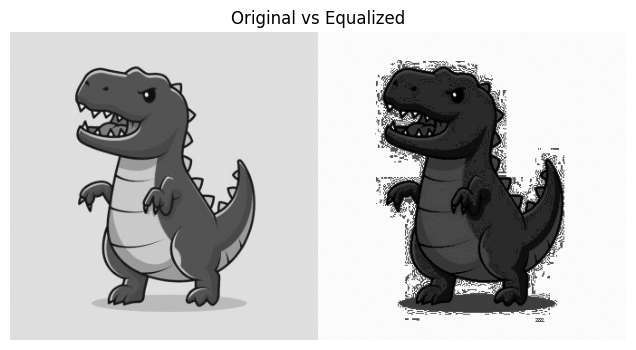

In [ ]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
from google.colab import files


uploaded = files.upload()
image_path = list(uploaded.keys())[0]
image = cv2.imread(image_path)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
eq = cv2.equalizeHist(gray)

combined = np.hstack((gray, eq))

plt.figure(figsize=(10, 4))
plt.imshow(combined, cmap='gray')
plt.title("Original vs Equalized")
plt.axis("off")
plt.show()

Saving dinosaur.jpg to dinosaur (1).jpg


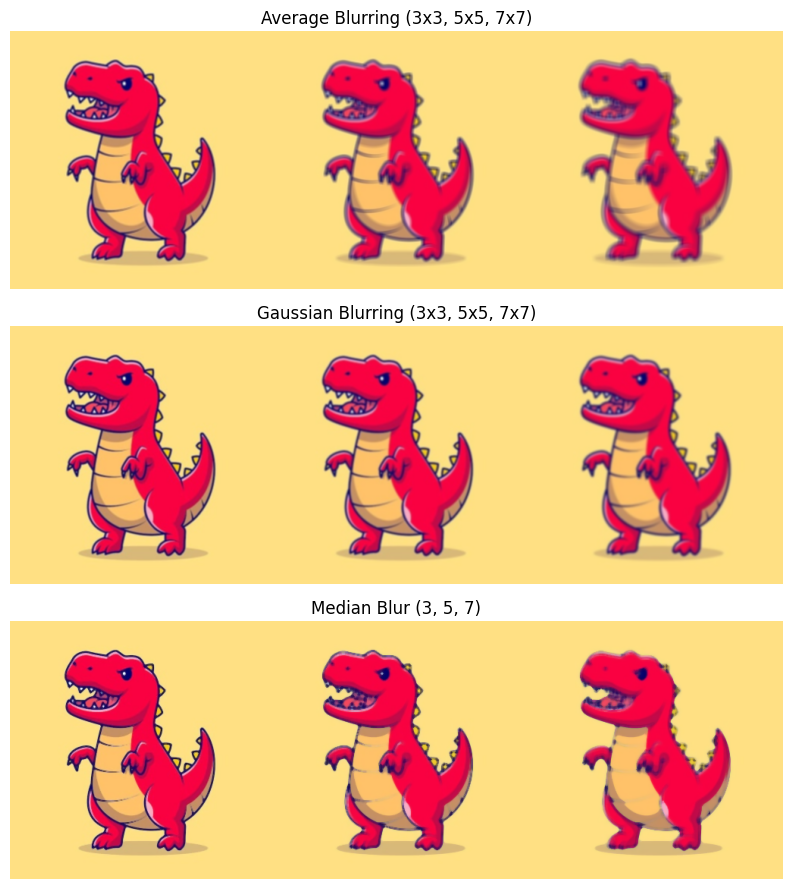

In [2]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
from google.colab import files


uploaded = files.upload()
image_path = list(uploaded.keys())[0]
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

average_blur = np.hstack([
    cv2.blur(image, (3, 3)),
    cv2.blur(image, (5, 5)),
    cv2.blur(image, (7, 7))
])

gaussian_blur = np.hstack([
    cv2.GaussianBlur(image, (3, 3), 0),
    cv2.GaussianBlur(image, (5, 5), 0),
    cv2.GaussianBlur(image, (7, 7), 0)
])

median_blur = np.hstack([
    cv2.medianBlur(image, 3),
    cv2.medianBlur(image, 5),
    cv2.medianBlur(image, 7)
])


plt.figure(figsize=(15, 9))


plt.subplot(3, 1, 1)
plt.imshow(average_blur)
plt.title("Average Blurring (3x3, 5x5, 7x7)")
plt.axis("off")

plt.subplot(3, 1, 2)
plt.imshow(gaussian_blur)
plt.title("Gaussian Blurring (3x3, 5x5, 7x7)")
plt.axis("off")

plt.subplot(3, 1, 3)
plt.imshow(median_blur)
plt.title("Median Blur (3, 5, 7)")
plt.axis("off")

plt.tight_layout()
plt.show()